In [1]:
#pip install rasterio
#!pip install seaborn

In [2]:

import os
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DIR = r'P:\2025\NOGAL CANYON\02_PRODUCTION\04_QA_QC\SURFACE_COMPARE\2025 - Updated 2019\Raster'
FILE_NAME = 'DTM2025-minus-1100980_XDTM_clipped'
RASTER_FILE = os.path.join(DIR, FILE_NAME + '.tif')

HISTOGRAM_TITLE = "Histogram of Raster Pixel Values (2025 vs Updated 2019)"

# Filter between -5 and 5
LOWER_RANGE = -5
UPPER_RANGE = 5

In [ ]:
# Open the raster
with rasterio.open(RASTER_FILE) as src:
    band = src.read(1)  # Read the first band
    nodata = src.nodata

# Flatten and filter out NoData values
flat_band = band.flatten()
valid_pixels = flat_band[flat_band != nodata]

# Convert to DataFrame
df = pd.DataFrame(valid_pixels, columns=['Pixel_Value'])

filtered_df = df[(df['Pixel_Value'] >= LOWER_RANGE) & (df['Pixel_Value'] <= UPPER_RANGE)]

# Calculate statistics
min_val = filtered_df['Pixel_Value'].min()
max_val = filtered_df['Pixel_Value'].max()
mean_val = filtered_df['Pixel_Value'].mean()
std_val = filtered_df['Pixel_Value'].std()


Saved: P:\2025\NOGAL CANYON\02_PRODUCTION\04_QA_QC\SURFACE_COMPARE\2025 - Updated 2019\Raster\Histogram\DTM2025-minus-1100980_XDTM_clipped_histogram.png


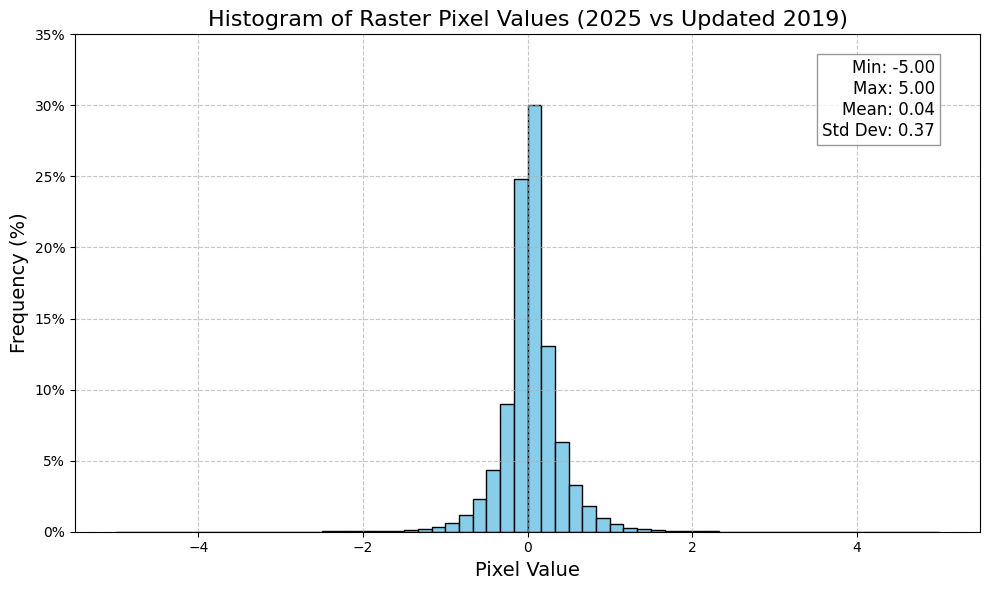

In [5]:

# Set number of bars (bins)
num_bins = 60  # Change this value to adjust the number of bars
y_lim = 35 # # Set Y-axis range to a maximum of 40%


# Plot histogram with frequency as percentage
plt.figure(figsize=(10, 6))
weights = np.ones_like(filtered_df['Pixel_Value']) * 100.0 / len(filtered_df)
plt.hist(filtered_df['Pixel_Value'], bins=num_bins, weights=weights, color='skyblue', edgecolor='black')

# Format Y-axis to show percentage with no decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

# Add labels and grid
plt.title(HISTOGRAM_TITLE, fontsize=16)
plt.xlabel('Pixel Value', fontsize=14)
plt.ylabel('Frequency (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, y_lim)

# Add statistics box
stats_text = f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nStd Dev: {std_val:.2f}"
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()


# Save the figure
histogram_dir = os.path.join(DIR, 'Histogram')
os.makedirs(histogram_dir, exist_ok=True)
OUTPUT_PNG = os.path.join(histogram_dir, FILE_NAME + '_histogram.png')
plt.savefig(OUTPUT_PNG, dpi=300)
print(f"Saved: {OUTPUT_PNG}")
